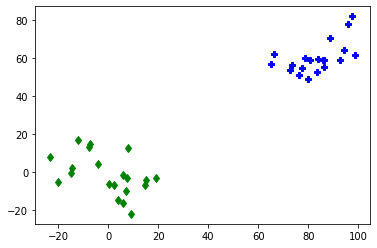

In [ ]:
# Librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import pandas as pd
import cvxpy as cp


# Los datos


# Determinar la cantidad de datos para cada conjunto
n = 20

# Creacion aleatoria de los conjuntos
x1 = 10*np.random.randn(n)
y1 = 10*np.random.randn(n)
x2 = 10*np.random.randn(n) + randrange(5)*n
y2 = 10*np.random.randn(n) + randrange(5)*n

# Graficar los conjuntos para comprobar que los conjuntos son liealmente separables

# Crear un objeto figura
fig, ax = plt.subplots()

# Graficar el primer conjunto de datos como diamantes verdes
ax.plot(x1,y1, "d", color="green")

# Graficar el segundo conjunto de puntos como cruces azules
ax.plot(x2,y2, "P", color="blue")

# Mostrar los datos
fig.show()

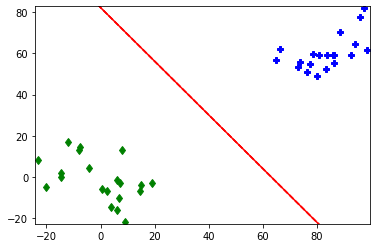

In [ ]:
# Preparacion de los datos


# Creacion de listas de los valores tanto en x como en y de los dos conjuntos
x = np.append(x1,[x2])
y = np.append(y1,[y2])

# Creacion de la lista que mostrara la etiqueta de cada elemnto del conjunto
etiquetas = []

# Etiquetar los datos segun su posicion en la lista de los dos conjuntos
for i in range(n):
  etiquetas.append(-1)
for i in range(n,2*n):
  etiquetas.append(1)

# Creacion de un dataframe con los datos y su respectiva etiqueta
dataframe = pd.DataFrame({'x':x, 'y':y, 'Etiqueta':etiquetas})

# Ajuste de la dimension de la lista con la etiquetas para poder 
etiquetas = np.reshape(etiquetas, (2*n, 1))

# Acomodar los datos en un arreglo a partir del data frame
arreglo_vectores = np.array([[dataframe['x'][0],dataframe['y'][0]]])
for j in range(2*n-1):
  arreglo_vectores = np.append(arreglo_vectores,[[dataframe['x'][j+1],dataframe['y'][j+1]]],0)



# El problema de Optimizacion


# Creacion de las variables
w = cp.Variable((2,1))
b = cp.Variable()

# Planteamiento del problema segun la teoria expuesta
objective = cp.Minimize((1/2)*cp.norm(w)**2)
constraints = [cp.multiply(etiquetas, arreglo_vectores*w + b) >= 1]

# Solucion del problema
prob = cp.Problem(objective, constraints)
result = prob.solve()



# Visualizacion


# Se crea un conjunto de puntos en el rango de valores de los datos
x = np.linspace(min(x1), max(x2), n)

# Generacion del hiperplano y dos margenes(opcionales), usando la solucion del problema de optimizacion
y = -(w.value[0]*x + b.value)/w.value[1]
h1 = -(w.value[0]*x + b.value)/w.value[1]
h2 = -(w.value[0]*x + b.value)/w.value[1]

# Graficar los datos junto con el hiperplano
fig, ax = plt.subplots()
ax.plot(x, h1, "--r")
ax.plot(x, h2, "--r")
ax.plot(x1, y1, "d", color="green")
ax.plot(x2, y2, "P", color="blue")
ax.plot(x, y, "r", label = "hiperplano")

# Para mejorar la visualizacion se restringe la dimension del grafico
plt.xlim(min(x1)-1, max(x2)+1)
plt.ylim(min(y1)-1, max(y2)+1)

# Mostrar los datos y el hiperplano encontrado
fig.show()